Target transformers
---

In [1]:
import pandas as pd

data_df = pd.read_csv('house-prices.csv')
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [2]:
from sklearn.model_selection import train_test_split

# Create X, y
X = data_df[['Overall Qual', 'Gr Liv Area']]
y = data_df.SalePrice

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.5, random_state=0)

In [3]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

regressor = TransformedTargetRegressor(
    regressor=LinearRegression(), func=np.log, inverse_func=np.exp)

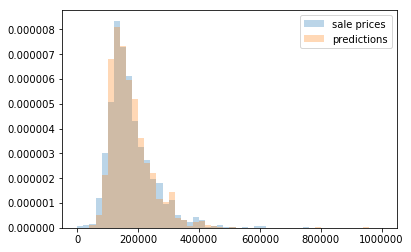

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make predictions
regressor.fit(X_tr, y_tr)
y_pred = regressor.predict(X_te)

# Plot predictions
plt.hist(y_te, bins=50, range=(0, 10**6), density=True, alpha=0.3, label='sale prices')
plt.hist(y_pred, bins=50, range=(0, 10**6), density=True, alpha=0.3, label='predictions')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import mean_absolute_error as MAE

print('MAE: {:,.0f}$'.format(MAE(y_te, y_pred)))

MAE: 25,412$


In [27]:
print('MAE: {:,.0f}$'.format(MAE(y_te, np.repeat(y_tr.median(), len(y_tr)))))

MAE: 54,742$


In [21]:
from sklearn.preprocessing import QuantileTransformer

regressor = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(output_distribution='normal', random_state=0))
regressor.fit(X_tr, y_tr)
print('MAE: {:,.0f}$'.format(MAE(y_te, regressor.predict(X_te))))

MAE: 24,728$


In [22]:
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline

regressor = TransformedTargetRegressor(
    regressor=make_pipeline(PowerTransformer(), LinearRegression()),
    transformer=QuantileTransformer(output_distribution='normal', random_state=0))
regressor.fit(X_tr, y_tr)
print('MAE: {:,.0f}$'.format(MAE(y_te, regressor.predict(X_te))))

MAE: 24,410$
